# Evaluating training logs

Following the training of the model, we will here evaluate the training logs, and plot the loss.

## Libraries & Setup

### Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Setup

In [41]:
log_dir = "../../logs/"
log_file_name = "logs-insights-results"

### Data Loading

In [42]:
logs = pd.read_csv(f"{log_dir}/{log_file_name}.csv")

## Evaluation

In [43]:
logs

,@timestamp,@message
0,2023-11-29 22:09:47.488,"{'loss': 0.0611, 'learning_rate': 1.9029495718..."
1,2023-11-29 22:07:35.454,"{'loss': 0.1042, 'learning_rate': 5.0745321915..."
2,2023-11-29 22:05:23.420,"{'loss': 0.0749, 'learning_rate': 8.2461148112..."
3,2023-11-29 22:03:11.386,"{'loss': 0.1126, 'learning_rate': 1.1417697431..."
4,2023-11-29 22:01:00.352,"{'loss': 0.118, 'learning_rate': 1.45892800507..."
...,...,...
625,2023-11-28 23:15:58.582,"{'loss': 0.4943, 'learning_rate': 0.0001984142..."
626,2023-11-28 23:13:46.549,"{'loss': 0.5703, 'learning_rate': 0.0001987313..."
627,2023-11-28 23:11:34.516,"{'loss': 0.5277, 'learning_rate': 0.0001990485..."
628,2023-11-28 23:09:22.484,"{'loss': 0.7296, 'learning_rate': 0.0001993656..."


In [44]:
loss_logs = logs[logs["@message"].str.contains("loss")]

In [45]:
loss_logs

,@timestamp,@message
0,2023-11-29 22:09:47.488,"{'loss': 0.0611, 'learning_rate': 1.9029495718..."
1,2023-11-29 22:07:35.454,"{'loss': 0.1042, 'learning_rate': 5.0745321915..."
2,2023-11-29 22:05:23.420,"{'loss': 0.0749, 'learning_rate': 8.2461148112..."
3,2023-11-29 22:03:11.386,"{'loss': 0.1126, 'learning_rate': 1.1417697431..."
4,2023-11-29 22:01:00.352,"{'loss': 0.118, 'learning_rate': 1.45892800507..."
...,...,...
625,2023-11-28 23:15:58.582,"{'loss': 0.4943, 'learning_rate': 0.0001984142..."
626,2023-11-28 23:13:46.549,"{'loss': 0.5703, 'learning_rate': 0.0001987313..."
627,2023-11-28 23:11:34.516,"{'loss': 0.5277, 'learning_rate': 0.0001990485..."
628,2023-11-28 23:09:22.484,"{'loss': 0.7296, 'learning_rate': 0.0001993656..."


In [46]:
loss_list_dict = loss_logs["@message"].apply(lambda x: eval(x)).tolist()

In [47]:
final_stats = loss_list_dict[0]

In [48]:
loss_list_dict = loss_list_dict[1:]

In [49]:
loss_df = pd.DataFrame(loss_list_dict)

In [50]:
# reverse the order of the rows --> from oldest to newest
loss_df = loss_df.iloc[::-1]

In [51]:
# we add the change in loss from the previous epoch to the dataframe
loss_df["loss_change"] = loss_df["loss"].pct_change()

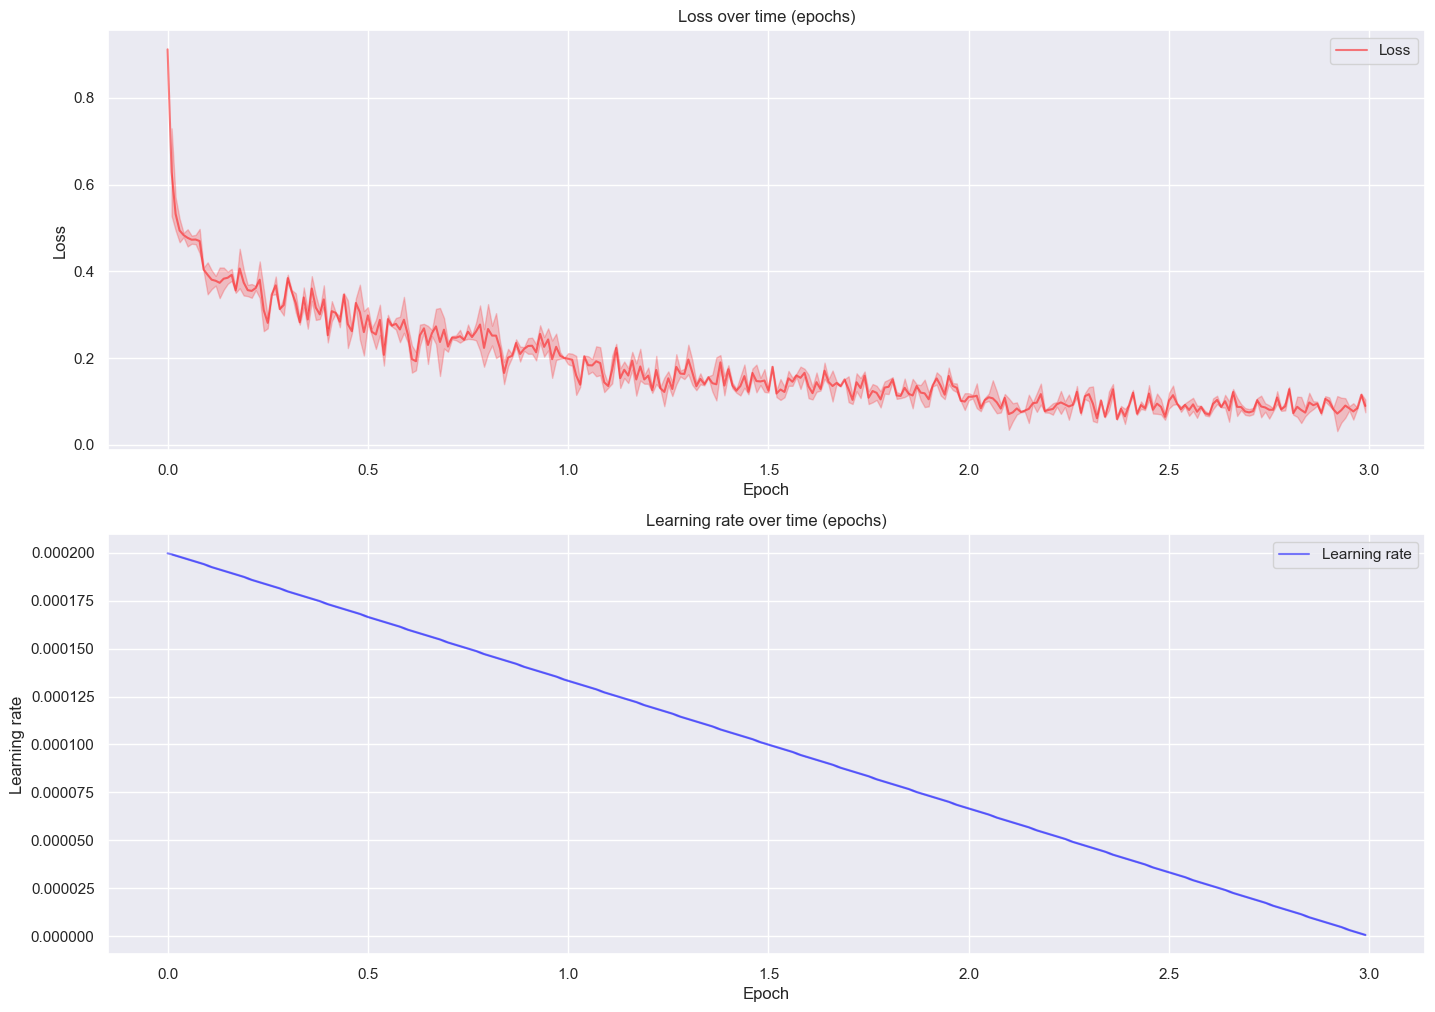

In [52]:
# grid plot (two plots in one)
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(
    nrows=2, ncols=1, sharex=False, sharey=False,
    figsize=(17, 12)
)

# LOSS OVER TIME
sns.lineplot(
    data=loss_df, x="epoch", y="loss", 
    ax=ax[0],
    label="Loss",
    color="red",
    alpha=0.5
)
ax[0].set_title("Loss over time (epochs)")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")

# LEARNING RATE OVER TIME
sns.lineplot(
    data=loss_df, x="epoch", y="learning_rate",
    ax=ax[1],
    label="Learning rate",
    color="blue",
    alpha=0.5
)
ax[1].set_title("Learning rate over time (epochs)")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Learning rate")

# CHANGE IN LOSS OVER TIME
# colors = np.where(loss_df["loss_change"] < 0, 'red', 'blue')
# sns.barplot(
#     data=loss_df, x="epoch", y="loss_change",
#     ax=ax[2],
#     label="Loss change",
#     palette=colors,    
#     alpha=0.5,
#     errorbar=None,
#     estimator=np.sum,
# )

# # add a horizontal line at y=0
# ax[2].axhline(y=0, color="black", linestyle="-", linewidth=1, alpha=0.5)

# ax[2].set_title("Loss change over time (epochs), positive values = loss decrease")
# ax[2].set_xlabel("Epoch")
# ax[2].set_ylabel("Loss change")

# ax[2].xaxis.label.set_visible(False)
# ax[2].tick_params(axis="x", which="both", bottom=False)
# ax[2].set_xticklabels([])

plt.savefig(f"{log_dir}/{log_file_name}.png")

plt.show()